# Eigen Picture Implementation

---
# Introduction

Recall that the eigen decomposition for the covariance matrix of 𝑋 is:


<img src = 'Image1.jpg'>


The eigenvectors 𝑢1,𝑢2,…,𝑢𝑘 associated with the eigenvalues 𝜆1,𝜆2,…,𝜆𝑘, 𝑘≤𝑚, are the first 𝑘 principal components that maximize the variance of the input dataset 𝑋 ∈ ℝ𝑛×𝑚 in 𝑘 directions. In computer vision, those components are of great use for tasks such as face recognition, and computer scientists defined those principal components as eigen pictures.

In this project, we implement the basic Principal Component Analysis (PCA) algorithm to find the eigen pictures from the raw data. Notice that we won't use the scikit-learn PCA implementation.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from PCA_utils import plot_gallary
%matplotlib inline

---
# Implementation

In [2]:
class EigenPic:
    
    
    
    def __init__(self,n_comp):
        """
        n_comp is the number of PCA components we need
        """
        self.n_comp = n_comp
        
        
        
    def _covariance(self,_X):
        """
        1. _X is the original data with shape (n,m), n is the number of observations and m is the number of features
        2. We calculate the covariance matrix, which has shape (m,m) without using np.cov()
        """
        #Compute the mean
        mean_X = np.mean(_X,axis=0)
        
        #Compute the difference between X and mean_X
        diff = _X - mean_X
        diff_T = diff.T
        
        #Compute the covariance
        cov_X = np.dot(diff_T,diff) #/ _X.shape[0]
        
        return cov_X
    
    
    
    def _eigs(self,cov_X):
        """
        We conduct eigen decomposition of the covariance matrix of X cov_X
        """
        eigval, eigvec = np.linalg.eigh(cov_X)
        
        return eigval, eigvec
    
    
    
    def fit(self,X):
        
        _covX = self._covariance(X)
        self.eigval, self.eigvec = self._eigs(_covX)
        
        """
        We get the eigen pictures
        """
        
        #Create the list of eigenvectors according to the sorted eigenvalues
        my_index = range(len(self.eigval))
        my_index_sorted = [x for _,x in sorted(zip(self.eigval,my_index), reverse=True)]
        my_index_sorted = my_index_sorted[0:self.n_comp]
        
        #Take the sorted eigenvalues
        eigval_sorted = self.eigval[my_index_sorted]
        
        #Take the sorted eigenvectors
        eigvec_sorted = self.eigvec[:,my_index_sorted]
        
        #Reset the dataframe
        self.eigval_sorted = eigval_sorted
               
        return eigvec_sorted


    
    def explained_variance_ratio(self):
        """
        We calculate the variance explained by n_comp PCA components
        """
        sum_eigval = sum(self.eigval)
        var_ratio = 0
        for i in range(0,self.n_comp):
            var_ratio += self.eigval_sorted[i]
        var_ratio = var_ratio/sum_eigval
        
        return var_ratio

---
# MNIST data

Two datasets are provided to verify our implementation. The first dataset is the MNIST database, which contains 60000 human handwritten digit images with resolution 28×28=784.

The MNIST dataset is loaded into two numpy arrays: img_arr, which is the gray scale raw image and has dimension (60000, 784), and img_lbl_arr, which is the label (digit) of the images and has dimension (60000,).

(60000, 784)
(60000,)


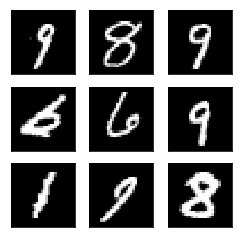

In [3]:
npz_file = np.load('mnist/mnist_arr.npz')
img_arr = npz_file['images']
img_lbl_arr = npz_file['labels']
print(img_arr.shape)
print(img_lbl_arr.shape)
plot_gallary(img_arr[np.random.choice(range(img_arr.shape[0]), size = 9)].reshape(-1, 28,28))

### Plot eigen pictures for the first 9 eigen digits of the number 6

We apply our PCA algorithm to the MNIST dataset using the above code. We use 9 principal components that explain more than 50% of variance and a figure with 9 eigen pictures that captures mostly the shape of the digit “6”.

In [4]:
# Run this block to get the 9 PCs for digit 6

n_comp = 9
pca_cls = EigenPic(n_comp)
pc_n = pca_cls.fit(img_arr[(img_lbl_arr == 6)])
var_ratio = pca_cls.explained_variance_ratio()
print('variance explained by the first %d components is %.4f'%(n_comp, var_ratio))

variance explained by the first 9 components is 0.5741


In [5]:
np.shape(pc_n)

(784, 9)

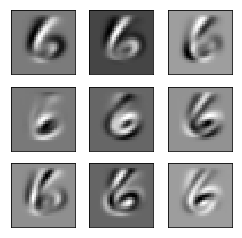

In [6]:
plot_gallary(pc_n.T.reshape(-1, 28, 28))

---
# Face data

The second dataset is the human face database, which contains 3023 human faces with resolution 50×37=1850. The face dataset is loaded into a numpy array face_arr, which is the gray scale raw image and has dimension (3023, 1850).

(3023, 1850)


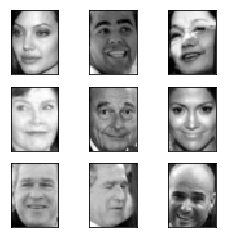

In [7]:
npz_file = np.load('mnist/face_data.npz')
face_arr = npz_file['images']
h, w = 50, 37
print(face_arr.shape)
plot_gallary(face_arr[np.random.choice(range(face_arr.shape[0]), size = 9)].reshape(-1, h, w))

### Plot the first 9 eigen faces. 

We apply our PCA implementation to the face dataset. We choose to take n_comp = 50 because with only 50 components out of 1850 we can explain 85% of the variance.

In [8]:
n_comp = 50
pca_cls = EigenPic(n_comp)
pc_n = pca_cls.fit(face_arr)
var_ratio = pca_cls.explained_variance_ratio()
print('variance explained by the first %d components is %.4f'%(n_comp, var_ratio))

variance explained by the first 50 components is 0.8522


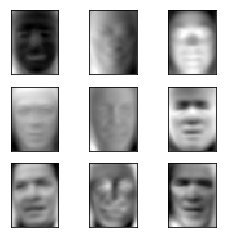

In [9]:
plot_gallary(pc_n.T.reshape(-1, h, w))